# Metody obliczeniowe w nauce i technice¶
## Laboratorium 5: Interpolacja - sprawozdanie
Jakub Pajor

## Lagrange

Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

![title](Lagrange_def.png)

In [3]:
using Polynomials
using Plots

In [4]:
function l(k, X)
    x_k = X[k]
    X = [x for x in X if x != x_k]
    p = Poly([1.0])
    q = 1
    for x_i in X
        p = p * poly([x_i])
        q = q * (x_k - x_i)
    end
    return (p / q)
end

function L(X, Y)
    p = Poly([0])
    for k in 1:1:length(Y)
        p = p + (Y[k] * l(k, X))
    end
    return p
end

L (generic function with 1 method)

In [43]:
x = 1:1:10
y = [rand() for a in x]
xs = 1.0:0.05:10.0



1.0:0.05:10.0

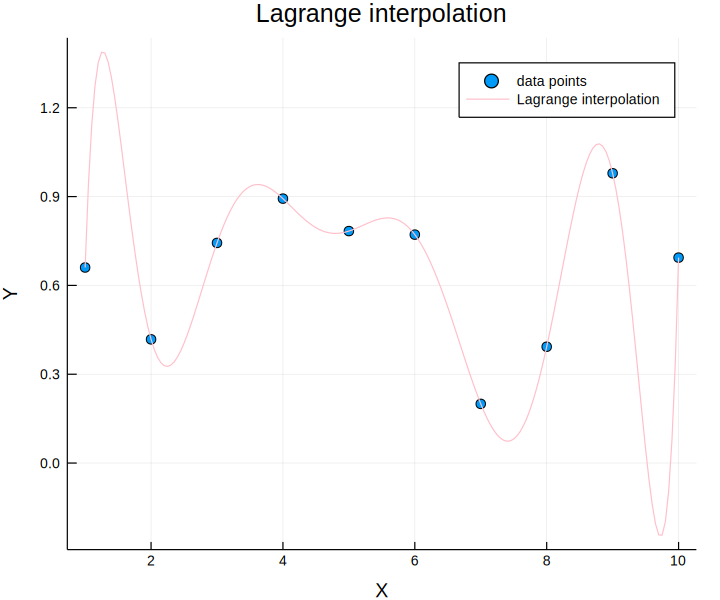

In [44]:
equL = L(x, y)

scatter(x, y, label = "data points")

plot!(xs, polyval(equL, xs),
    color=:pink,
    label = "Lagrange interpolation",
    xlabel = "X",
    ylabel = "Y",
    title = "Lagrange interpolation",
    dpi = 120,
    size = (600,500)
    )

## Newton

Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

![title](Newton_def.png)

In [20]:
function comp_n(X, y_k, k, p_k)
    x_k = X[k]
    p = y_k - polyval(p_k, x_k)
    q = 1
    for i in 1:1:k-1
        q = q * (x_k - X[i])
    end
    return (p / q)
end

function N(X, Y, n)
    if n == 1
        Poly(float(Y[1]))
    else
        pp = N(X, Y, n-1)
        c = comp_n(X, Y[n], n, pp)
        poly([X[i] for i in 1:1:n-1]) * c + pp
    end
end

function N(X, Y)
    N(X, Y, length(Y))
end

N (generic function with 2 methods)

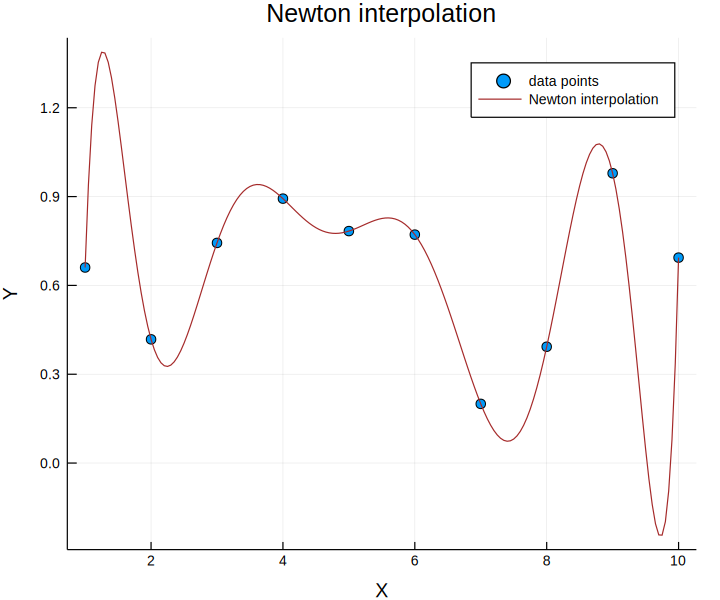

In [45]:
equN = N(x, y)

scatter(x, y,label = "data points")

plot!(xs, polyval(equN, xs),
    color=:brown,
    label = "Newton interpolation",
    xlabel = "X",
    ylabel = "Y",
    title = "Newton interpolation",
    dpi = 120,
    size = (600,500))

## Polynomials

Zastosowac interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

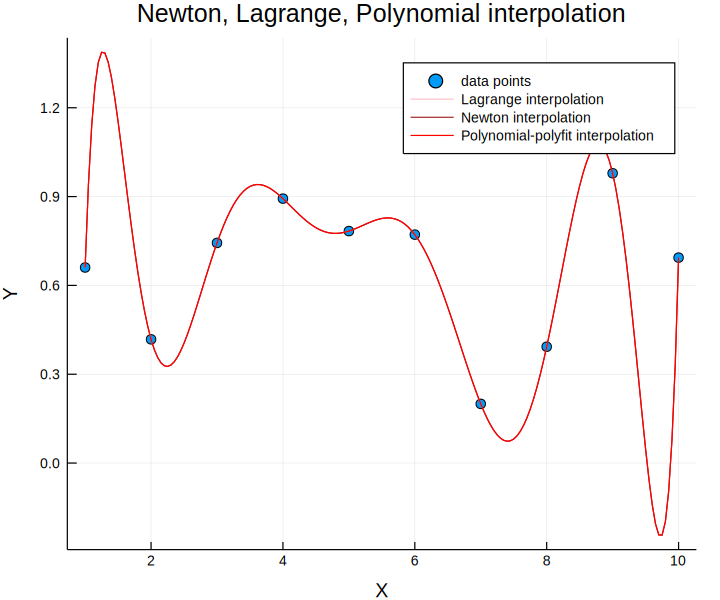

In [46]:
equP = polyfit(x, y)

scatter(x, y, label = "data points")

plot!(xs, polyval(equL, xs),
    color=:pink,
    label = "Lagrange interpolation",
)

plot!(xs, polyval(equN, xs),
    color=:brown,
    label = "Newton interpolation")

plot!(xs, polyval(equP, xs),
    color=:red,
    label = "Polynomial-polyfit interpolation",
    xlabel = "X",
    ylabel = "Y",
    title = "Newton, Lagrange, Polynomial interpolation",
    dpi = 120,
    size = (600,500))

Każdy z interpolujących wielomianów prechodzi przez te same punkty. Dzieje się tak, gdyż dla danych n+1 punktów istnieje dokładnie jeden wielomian n-tego stopnia, który przez nie przechodzi.

## Analiza

Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.

In [26]:
using DataFrames
using Statistics

In [50]:
df = DataFrame(type=String[], size = Int64[], time = Float64[])
        
types=[];sizes=[];times=[]
range = 100:100:500
for rr in range
    xx = 0:1:rr
    for i in 1:1:10
        yy = rand(Int, rr+1)
        push!(df,["lagrange", rr, @elapsed L(xx,yy)])        
        push!(df, ["newton", rr, @elapsed N(xx,yy)])
        push!(df, ["polyfit", rr, @elapsed polyfit(xx,yy)])
    end
end
df

,type,size,time
,String,Int64,Float64
1,lagrange,100,0.0156968
2,newton,100,0.00058451
3,polyfit,100,0.000611382
4,lagrange,100,0.0173896
5,newton,100,0.000501716
6,polyfit,100,0.000198969
7,lagrange,100,0.00677467
8,newton,100,0.000429562
9,polyfit,100,0.000170501


In [51]:
pol_res = by(df, [1,2]) do dff
    DataFrame(time_mean = mean(dff[3]), time_std = std(dff[3]))
end

,type,size,time_mean,time_std
,String,Int64,Float64,Float64
1,lagrange,100,0.0100212,0.00435218
2,newton,100,0.000363283,0.000105236
3,polyfit,100,0.000195765,0.000147574
4,lagrange,200,0.0405791,0.00540252
5,newton,200,0.00191023,0.000790464
6,polyfit,200,0.000724788,0.000814945
7,lagrange,300,0.127135,0.00505647
8,newton,300,0.00477466,0.000192925
9,polyfit,300,0.00120259,0.000118685


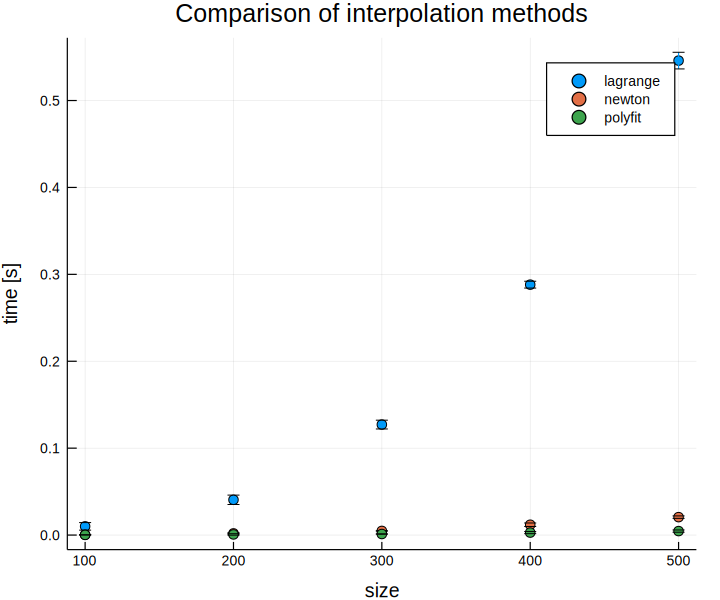

In [52]:
scatter(pol_res[:size], 
        pol_res[:time_mean], 
        group = pol_res[:type],
        yerr = pol_res[:time_std],
        xlabel = "size",
        ylabel = "time [s]",
        dpi = 120,
        size = (600,500),
        title = "Comparison of interpolation methods")

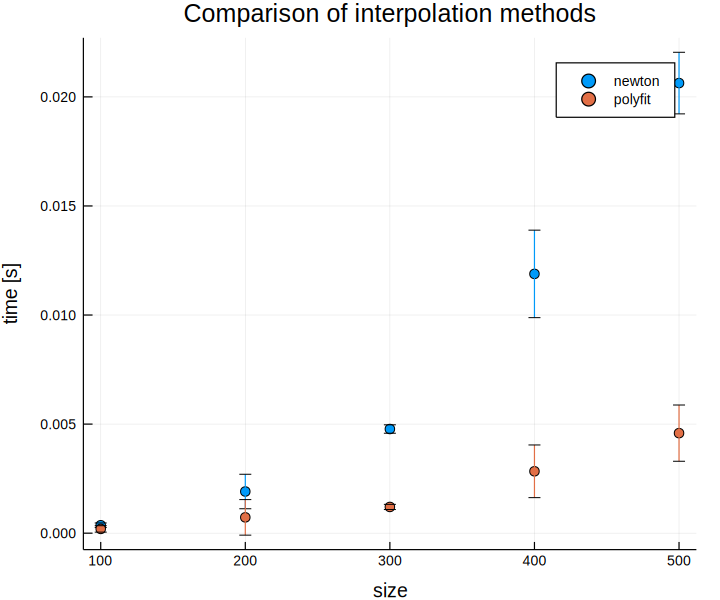

In [53]:
## dataframe without lagrange
pol_res_noL = pol_res[pol_res[:type].!= "lagrange", :]

scatter(pol_res_noL[:size], 
        pol_res_noL[:time_mean], 
        group = pol_res_noL[:type],
        yerr = pol_res_noL[:time_std],
        xlabel = "size",
        ylabel = "time [s]",
        dpi = 120,
        size = (600,500),
        title = "Comparison of interpolation methods")

## Eksperyment

Poeksperymentowac z interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane), narysowac wykresy i porownac z wykresami interpolacji wielomianowej.

In [37]:
using Interpolations

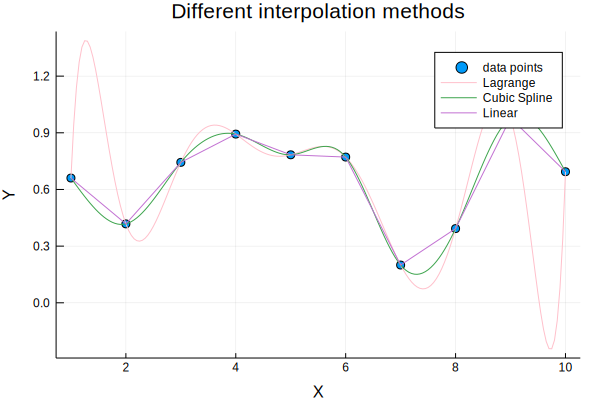

In [54]:
scatter(x, y, label = "data points")

 plot!(xs, polyval(equL, xs),
     color=:pink,
     label = "Lagrange")

plot!(xs, [CubicSplineInterpolation(x,y)(i) for i in xs],
        label = "Cubic Spline")

plot!(xs, [interpolate(y, BSpline(Linear()))(i) for i in xs],
        label = "Linear",
        xlabel = "X",
        ylabel = "Y",
        title = "Different interpolation methods")

## Runge's phenomenon

Zademonstrowac efekt Rungego

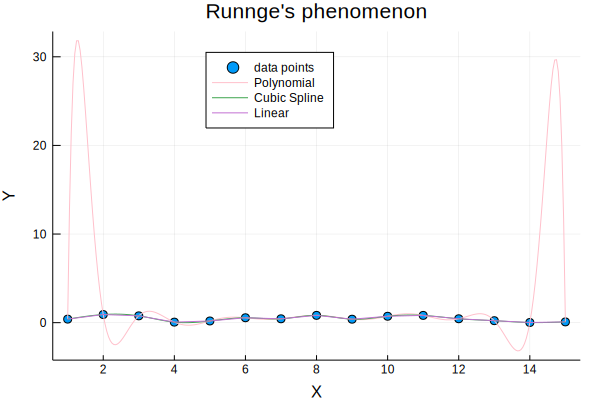

In [68]:
Rx = 1:1:15
Ry = [rand() for a in Rx]
Rxs = 1.0:0.05:15.0


scatter(Rx, Ry, label = "data points")

plot!(Rxs, polyval(polyfit(Rx,Ry), Rxs),
      color=:pink,
      label = "Polynomial")

plot!(Rxs, [CubicSplineInterpolation(Rx,Ry)(i) for i in Rxs],
      label = "Cubic Spline")

plot!(Rxs, [interpolate(Ry, BSpline(Linear()))(i) for i in Rxs],
      label = "Linear",
      legend = :top,
      xlabel = "X",
      ylabel = "Y",
      title = "Runnge's phenomenon")

Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.

In [27]:
using Images
using FileIO
using ImageMagick
using Colors

totem = load("totem.ascii.pgm")
totem = float32.(totem)
                
function two_times_smaller(source, srcWidth, srcHeight)
    tgtWidth = srcWidth/2
    tgtHeight = srcHeight/2
    target = zeros(Int32(tgtHeight), Int32(tgtWidth))
    for y = 1:(Int32(tgtHeight) - 1) 
        y2 = Int32(2*y)
        for x = 1:(Int32(tgtWidth) - 1)
            x2 = Int32(2*x)
            p = (source[y2, x2] + source[y2, x2 + 1]) / 2
            q = (source[y2 + 1, x2] + source[y2+1, x2+1]) / 2
            target[y, x] = (p + q) / 2
        end
    end
    return target
end

function two_times_bigger(source, srcWidth, srcHeight)
    tgtWidth = srcWidth * 2
    tgtHeight = srcHeight * 2
    target = zeros(Int32(tgtHeight), Int32(tgtWidth))
    for y2 = 1:(Int32(tgtHeight) - 1)
        for x2 = 1:(Int32(tgtWidth) - 1)
            x = Int32(floor(x2/2))
            y = Int32(floor(y2/2))
            
            if(x < 1)
                x = 1
            elseif(x > srcWidth)
                x = srcWidth
            end
                
            if(y < 1)
                y = 1
            elseif(y > srcWidth)
                y = srcHeight
            end
            
            p = source[y,x]
            
            p1 = source[y, x+1]
            p2 = source[y+1, x]
            p3 = source[y+1,x+1]
            
            d1 = abs(p - p1)
            d2 = abs(p - p2)
            d3 = abs(p - p3)
            d4 = abs(p1 - p2)
            
            min = d1
            if min > d2 
                min = d2
            elseif min > d3
                min = d3
            elseif min > d4
                min = d4
            end
            
            if min == d1
                target[y2, x2] = (p + p1)/2
            elseif min == d2 
                target[y2, x2] = (p + p2)/2
            elseif min == d3 
                target[y2, x2] = (p + p3)/2
            else
                target[y2, x2] = (p + (p1 + p2) / 2) / 2
            end
        end
    end
    return target
end                              
            

totem_smaller = two_times_smaller(venus, 640, 480)
totem_smaller = Gray.(venus1)
totem_smaller_to_original = two_times_bigger(venus1, 320, 240)
totem_smaller_to_original = Gray.(venus2)
print()

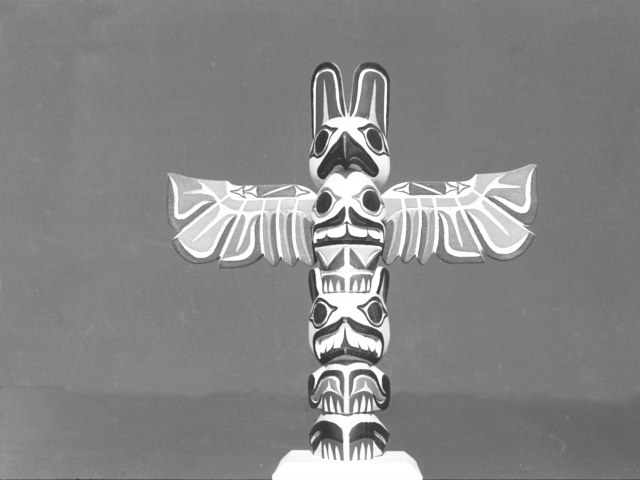

In [28]:
totem

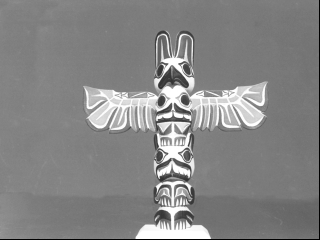

In [29]:
totem_smaller

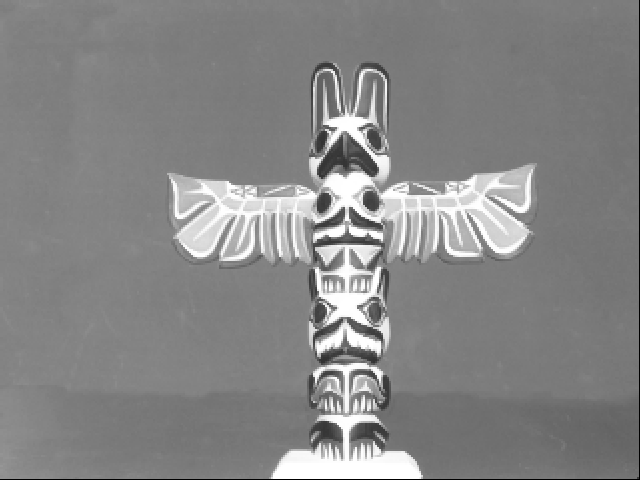

In [30]:
totem_smaller_to_original